# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2

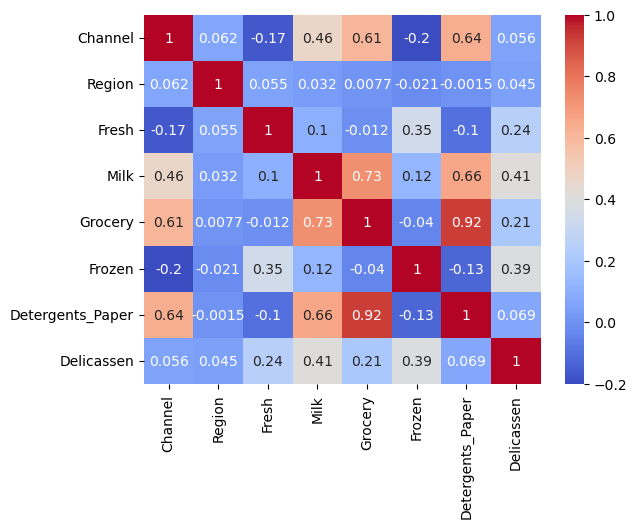

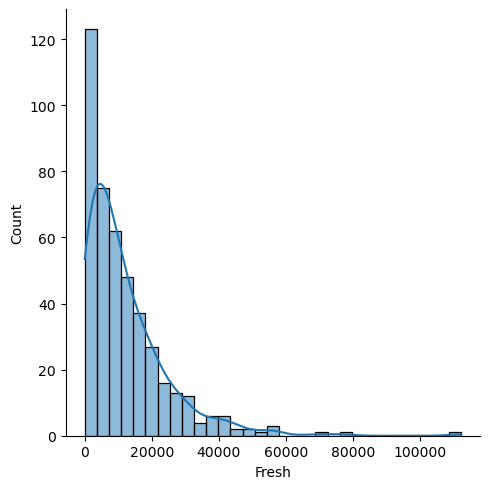

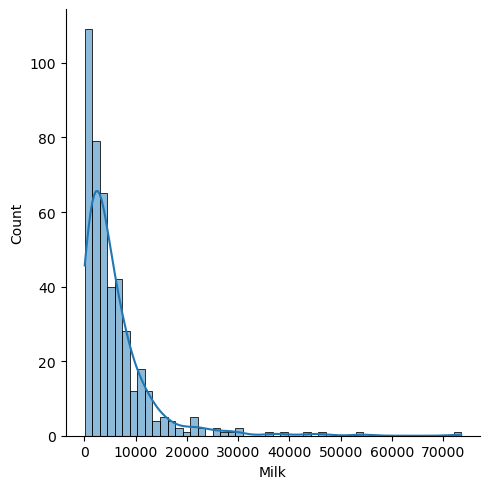

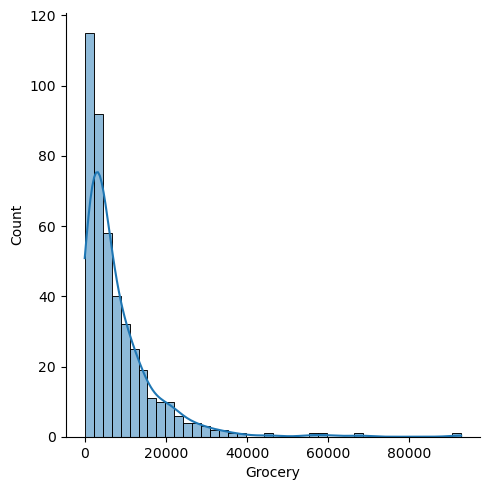

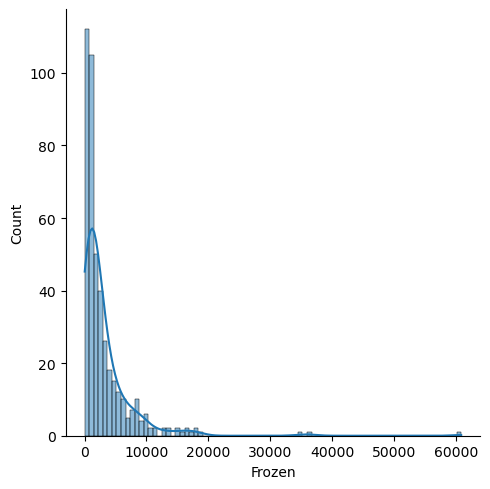

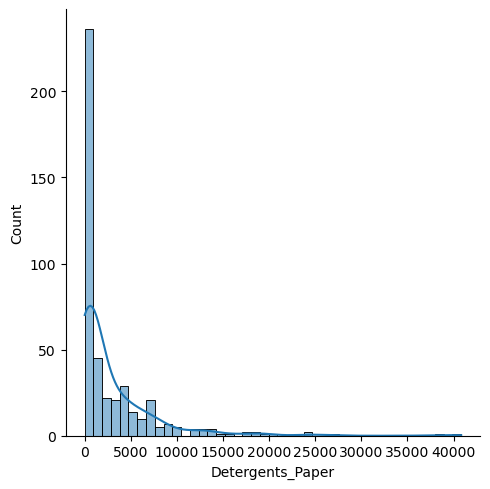

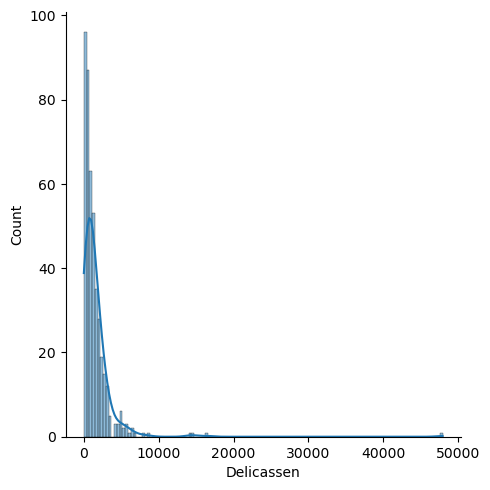

In [4]:
# Your code here:

import seaborn as sns
print(customers.info())

print(customers.describe())

corr = customers.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

sns.displot(customers['Fresh'], kde=True)
plt.show()

sns.displot(customers['Milk'], kde=True)
plt.show()

sns.displot(customers['Grocery'], kde=True)
plt.show()

sns.displot(customers['Frozen'], kde=True)
plt.show()

sns.displot(customers['Detergents_Paper'], kde=True)
plt.show()

sns.displot(customers['Delicassen'], kde=True)
plt.show()


In [ ]:
# Your observations here

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

In [ ]:
# Your comment here
The dataframe is clean and well-organized, with no missing values or obvious data quality issues.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [5]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

cols_to_scale = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

scaler = StandardScaler()

customers_scale = scaler.fit_transform(customers[cols_to_scale])


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [8]:
# Your code here:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(customers_scale)

customers['labels'] = kmeans.labels_


Count the values in `labels`.

In [13]:
# Your code here:

customers['labels'].value_counts()



3    270
1     96
0     63
4     10
2      1
Name: labels, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [14]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scale)

customers['labels_DBSCAN'] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [16]:
# Your code here
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,3,0
1,2,3,7057,9810,9568,1762,3293,1776,1,0
2,2,3,6353,8808,7684,2405,3516,7844,1,-1
3,1,3,13265,1196,4221,6404,507,1788,3,0
4,2,3,22615,5410,7198,3915,1777,5185,0,-1


In [20]:

customers['labels'].value_counts()

3    270
1     96
0     63
4     10
2      1
Name: labels, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'DBSCAN')

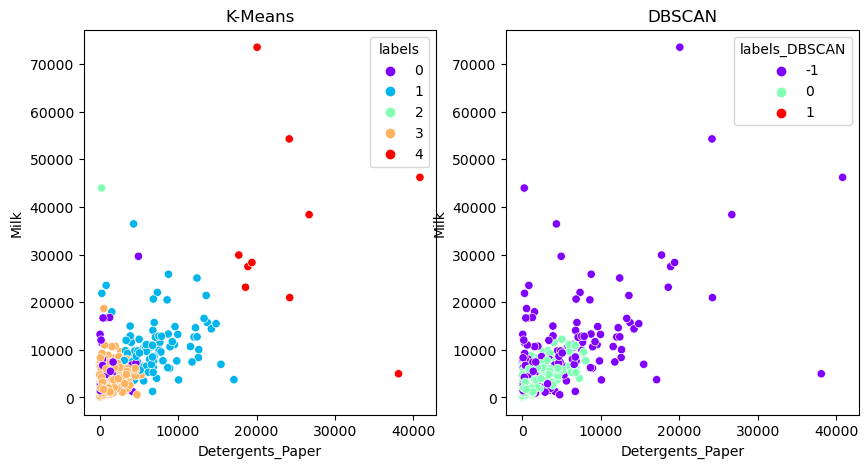

In [21]:
# Your code here:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(x=customers['Detergents_Paper'], y=customers['Milk'], hue=customers['labels'], palette='rainbow')
plt.title('K-Means')

plt.subplot(1,2,2)
sns.scatterplot(x=customers['Detergents_Paper'], y=customers['Milk'], hue=customers['labels_DBSCAN'], palette='rainbow')
plt.title('DBSCAN')


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

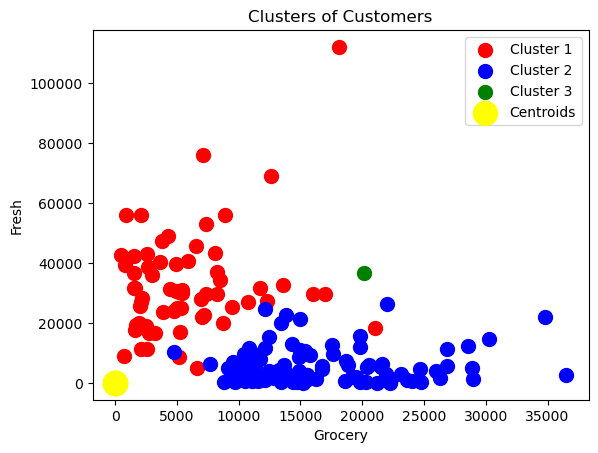

In [22]:
# Your code here:
plt.scatter(customers[customers['labels'] == 0]['Grocery'], customers[customers['labels'] == 0]['Fresh'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(customers[customers['labels'] == 1]['Grocery'], customers[customers['labels'] == 1]['Fresh'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(customers[customers['labels'] == 2]['Grocery'], customers[customers['labels'] == 2]['Fresh'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.legend()
plt.show()


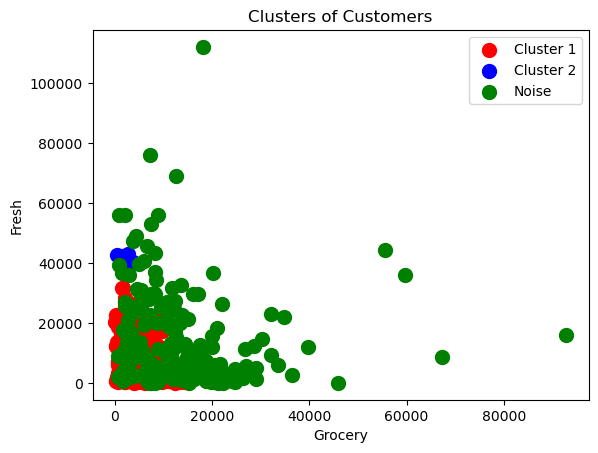

In [23]:
plt.scatter(customers[customers['labels_DBSCAN'] == 0]['Grocery'], customers[customers['labels_DBSCAN'] == 0]['Fresh'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(customers[customers['labels_DBSCAN'] == 1]['Grocery'], customers[customers['labels_DBSCAN'] == 1]['Fresh'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(customers[customers['labels_DBSCAN'] == -1]['Grocery'], customers[customers['labels_DBSCAN'] == -1]['Fresh'], s = 100, c = 'green', label = 'Noise')
plt.title('Clusters of Customers')
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.legend()
plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

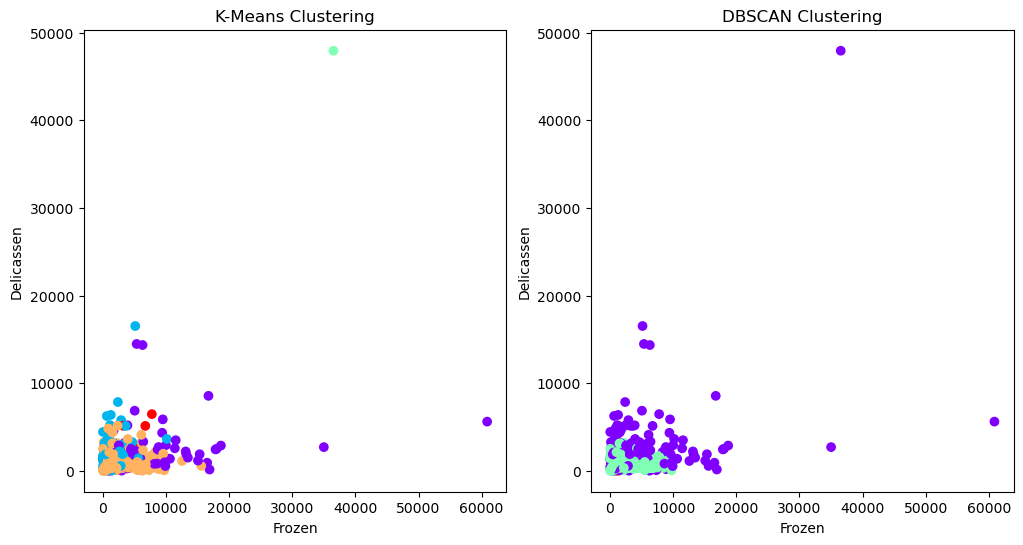

In [24]:
# Your code here:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

axs[0].scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels'], cmap='rainbow')
axs[0].set_xlabel('Frozen')
axs[0].set_ylabel('Delicassen')
axs[0].set_title('K-Means Clustering')

axs[1].scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels_DBSCAN'], cmap='rainbow')
axs[1].set_xlabel('Frozen')
axs[1].set_ylabel('Delicassen')
axs[1].set_title('DBSCAN Clustering')

plt.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [25]:
# Your code here:

kmeans_means = customers.groupby('labels').mean()
print("K-Means Means:")
print(kmeans_means)

dbscan_means = customers.groupby('labels_DBSCAN').mean()
print(dbscan_means)


K-Means Means:
         Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       1.126984  2.682540  32957.984127   4997.349206   5884.761905   
1       1.906250  2.520833   5754.166667  10866.604167  16607.104167   
2       1.000000  3.000000  36847.000000  43950.000000  20170.000000   
3       1.137037  2.518519   9092.155556   2967.759259   3807.411111   
4       2.000000  2.500000  15964.900000  34708.500000  48536.900000   

              Frozen  Detergents_Paper    Delicassen  labels_DBSCAN  
labels                                                               
0        8422.841270        954.603175   2462.968254      -0.746032  
1        1464.125000       7202.875000   1813.385417      -0.729167  
2       36534.000000        239.000000  47943.000000      -1.000000  
3        2271.759259        989.814815    978.962963      -0.151852  
4        3054.600000      24875.200000   2942.800000      -1

Which algorithm appears to perform better?

In [ ]:
# Your observations here
 it appears that the K-Means algorithm has performed better for this dataset than the DBSCAN algorithm.

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here